In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_iris(return_X_y=True)
X, y = X[y < 2], y[y < 2]
X_train, X_test, y_train, y_test = train_test_split(X, y)


# Basic

## FTTransformer

FTTransformer is trained for 100
epochs with 64 batch size. AdamW optimizer with 0.0001 learning rate and 10−5 weight decay is
applied to update network parameters.

In [7]:
from adbench.baseline.FTTransformer.run import FTTransformer
model = FTTransformer(seed=42, model_name = 'FTTransformer', n_epochs=3)
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict
print(y_test)
print(np.round(score).astype(int))
print(np.sum(np.abs(y_test-np.round(score))))
print(score)

GPU is off


c:\Users\kaami\anaconda3\lib\site-packages\delu\_utils.py:22: DeLUDeprecationWarning: The function improve_reproducibility` is deprecated and will be removed in future releases. Instead, use `delu.random.seed` and manually set flags mentioned in the `PyTorch docs on reproducibility <https://pytorch.org/docs/stable/notes/randomness.html>`_
  warnings.warn(


Epoch 001 | Validation metric: 1.0000 <<< BEST VALIDATION EPOCH
Epoch 002 | Validation metric: 1.0000
Epoch 003 | Validation metric: 1.0000
[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0]
[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0]
0.0
[0.08601463 0.84738636 0.8290972  0.10320327 0.84258074 0.8284931
 0.75809556 0.84310883 0.11315625 0.85173064 0.08502733 0.84281564
 0.80025935 0.81357646 0.8414967  0.83021957 0.83492494 0.08873788
 0.82364994 0.8242303  0.845862   0.08886345 0.18766175 0.08996285
 0.08774083]


In [16]:
from adbench.baseline.FTTransformer.run import FTTransformer
model = FTTransformer(seed=42, model_name = 'ResNet', n_epochs=3)
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict
print(y_test)
print(np.round(score).astype(int))
print(np.sum(np.abs(y_test-np.round(score))))
print(score)

c:\Users\kaami\anaconda3\lib\site-packages\delu\_utils.py:22: DeLUDeprecationWarning: The function improve_reproducibility` is deprecated and will be removed in future releases. Instead, use `delu.random.seed` and manually set flags mentioned in the `PyTorch docs on reproducibility <https://pytorch.org/docs/stable/notes/randomness.html>`_
  warnings.warn(


Epoch 001 | Validation metric: 1.0000 <<< BEST VALIDATION EPOCH
Epoch 002 | Validation metric: 1.0000
Epoch 003 | Validation metric: 1.0000
[0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
9.0
[0.63305926 0.97763413 0.96216106 0.62829417 0.9773557  0.9624396
 0.9141353  0.9795376  0.68506676 0.983905   0.61072344 0.9822881
 0.9478087  0.9536032  0.97010124 0.96885395 0.9741048  0.6502565
 0.9556793  0.95490766 0.98349136 0.5760079  0.66720474 0.657648
 0.59638804]


## AE

In [11]:
from pyod.models.auto_encoder import AutoEncoder
clf = AutoEncoder(contamination=0.05)
clf.fit(X_train[y_train==0])

# predykcja (1 = anomalia, 0 = normalne)
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)
clf.predict_proba(X_test)

Training: 100%|██████████| 10/10 [00:00<00:00, 118.04it/s]

[1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1]
[1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1]


array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.65624368, 0.34375632],
       [0.66879919, 0.33120081],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.26834422, 0.73165578],
       [0.78706986, 0.21293014],
       [0.        , 1.        ],
       [0.48561907, 0.51438093],
       [0.42153734, 0.57846266],
       [0.6480602 , 0.3519398 ],
       [0.7524032 , 0.2475968 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.67480516, 0.32519484],
       [0.        , 1.        ],
       [0.97874581, 0.02125419],
       [0.10843194, 0.89156806],
       [0.36986476, 0.63013524],
       [0.36860847, 0.63139153],
       [0.        , 1.        ],
       [0.        , 1.        ]])

## VAE


In [31]:
from pyod.models.vae import VAE
clf = VAE(contamination=0.1)
clf.fit(X_train[y_train==0])

# predykcja (1 = anomalia, 0 = normalne)
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)

Training: 100%|██████████| 30/30 [00:00<00:00, 79.93it/s]

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]


# REPEN

REPresentations for a random nEarest Neighbor distance-based method (REPEN) [127].

A neural network-based model that leverages transformed low-dimensional representation for
random distance-based detectors. 

The hidden size of REPEN is set to 20, and the margin of triplet
loss is set to 1000. 

REPEN is trained for 30 epochs with 256 batch size, where the total number of
steps (batches of samples) is set to 50. 

Adadelta [187] optimizer with 0.001 learning rate and 0.95
ρ is applied to update network parameters

In [1]:
from adbench.baseline.REPEN.run import REPEN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# Load data and filter to binary classes
X, y = load_iris(return_X_y=True)
X, y = X[y < 2], y[y < 2]  # Classes 0 and 1

# Split with stratification and enforce class presence
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Verify both classes exist in training data
assert 0 in y_train and 1 in y_train, "Training data must contain both classes."

# Initialize and train the model
model = REPEN(seed=42, mode='semi_supervised', n_epochs=3, batch_size=8)
model.fit(X_train, y_train)  # Fit
score = model.predict_score(X_test)  # Predict scores

# Output results
print("True labels:", y_test)
print("Predicted scores (rounded):", np.round(score).astype(int))
print("Number of mismatches:", np.sum(np.abs(y_test - np.round(score))))
print("Raw scores:", score)

ValueError: No inliers found. Check training data labels.

In [51]:
from adbench.baseline.REPEN.run import REPEN


model = REPEN(seed=42, mode = 'semi_supervised', n_epochs=3, batch_size=8) #"semi_supervised"
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict
print(y_test)
print(np.round(score).astype(int))
print(np.sum(np.abs(y_test-np.round(score))))
print(score)

c:\Users\kaami\anaconda3\lib\site-packages\adbench\baseline\REPEN\model.py:160: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  network.model.fit_generator(self.batch_generator(x_train, positive_weights,


ValueError: 'a' cannot be empty unless no samples are taken

In [47]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from adbench.baseline.REPEN.run import REPEN as REPEN_Model
# from adbench.baseline.REPEN.utils import create_model
from sklearn.metrics import classification_report

# 1. Załaduj dane (klasy 0 i 1 tylko)
X, y = load_iris(return_X_y=True)
X, y = X[y < 2], y[y < 2]

# 2. Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(
    X.astype(np.float32),
    y.astype(np.int32),
    test_size=0.3,
    stratify=y,
    random_state=42
)

# 3. Binary labels (0 = normalne, 1 = anomalie)
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# 4. Stwórz model REPEN z małym batch_size
config = {
    'hidden_size': [20],
    'batch_size': 16,         # << KLUCZOWE
    'n_epochs': 5,
    'learning_rate': 1e-3,
    'weight_decay': 1e-5,
    'mode': 'semi_supervised',
    'verbose': True
}

model = REPEN_Model(seed=42, mode = 'semi_supervised', n_epochs=3, batch_size=8)
# network = create_model(config, input_dim=X.shape[1])
model.fit(X_train, y_train_bin)

# 5. Predykcja
scores = model.decision_function(X_test)
y_pred = (scores > 0.5).astype(int)

# 6. Raport
print("Score:", scores)
print(classification_report(y_test_bin, y_pred))


c:\Users\kaami\anaconda3\lib\site-packages\adbench\baseline\REPEN\model.py:160: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  network.model.fit_generator(self.batch_generator(x_train, positive_weights,


ValueError: 'a' cannot be empty unless no samples are taken

## DeepSVDD

In [6]:
from pyod.models.deep_svdd import DeepSVDD
clf = DeepSVDD(n_features=4 , contamination=0.1, epochs=4)
clf.fit(X_train[y_train==0])

# predykcja (1 = anomalia, 0 = normalne)
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)
print(clf.predict_proba(X_test))

Epoch 1/4, Loss: 1.9810851216316223
Epoch 2/4, Loss: 1.8542762398719788
Epoch 3/4, Loss: 2.054482400417328
Epoch 4/4, Loss: 1.8232354521751404
[1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
[1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.38400638 0.61599362]
 [0.88631117 0.11368883]
 [0.         1.        ]
 [0.82622339 0.17377661]
 [0.28905475 0.71094525]
 [0.62636611 0.37363389]
 [0.         1.        ]
 [0.98377665 0.01622335]
 [0.53291056 0.46708944]
 [0.91153913 0.08846087]
 [0.         1.        ]
 [0.         1.        ]
 [0.97847327 0.02152673]
 [0.         1.        ]
 [0.         1.        ]]


## DAGMM

We train the DAGMM
for 200 epochs with 256 batch size, where the patience of early stopping is set to 50. 

The learning
rate of Adam [77] optimizer is 0.0001 and is decayed once the number of epochs reaches 50. 

The
latent dimension of DAGMM is set to 1 and the number of Gaussian mixture components is set
to 4. 

The λ1 and λ2 for energy and covariance in the objective function are set to 0.1 and 0.005,
respectively.

In [33]:
from adbench.baseline.DAGMM.run import DAGMM
model = DAGMM(seed=42, num_epochs=4, patience=1, batch_size=4)
model.fit(X_train=X_train[y_train==0], y_train=np.repeat(0, X_train.shape[0]))  # fit
score = model.predict_score(X_train[y_train==0], X_test)  # predict
print(y_test)
print(np.round(score).astype(int))
print(score)

using the params: 4
Testing...
[1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
[ 28  28  28  28 -11  -6  -8  28  -8  -4  -7  28 -11  -8 -11  28  28 -11
  28  28]
[ 27.631021   27.631021   27.631021   27.631021  -11.410937   -6.2789845
  -8.4208765  27.631021   -7.9916368  -3.5636723  -6.8902154  27.631021
 -11.35948    -7.900032  -10.56761    27.631021   27.631021  -10.946327
  27.631021   27.631021 ]


funkcja logit

In [34]:
from adbench.baseline.DAGMM.run import DAGMM
model = DAGMM(seed=42, num_epochs=4, patience=1, batch_size=4)
model.fit(X_train=X_train, y_train=np.repeat(0, X_train.shape[0]))  # fit
score = model.predict_score(X_train, X_test)  # predict
print(y_test)
print(np.round(score).astype(int))
print(score)

using the params: 4
Testing...
[1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
[ -9  -9  -9  -9 -10  -3 -10  -9  -8  -9  -6  -9 -10  -6  -9  -9 -10  -9
  -9  -8]
[-8.800342  -9.01744   -9.184917  -9.28353   -9.971402  -2.800013
 -9.799926  -9.203053  -7.5901213 -9.101178  -6.1197586 -9.400011
 -9.855598  -6.491729  -8.845618  -8.858022  -9.887117  -9.351005
 -8.703335  -7.6525674]


# Extension

## DevNet

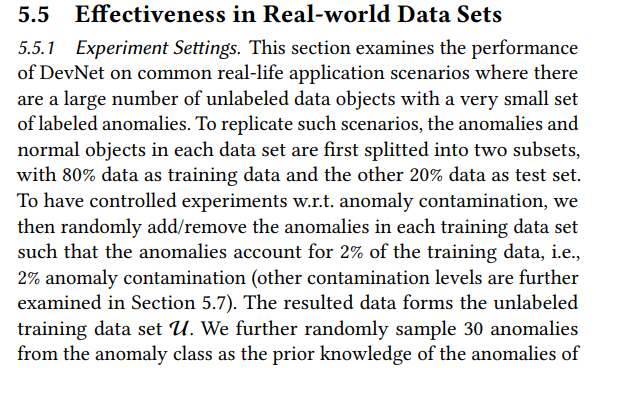

In [12]:
from pyod.models.devnet import DevNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import numpy as np

# Przykładowe dane (binarna klasyfikacja)
X, y = load_iris(return_X_y=True)
X, y = X[y < 2], y[y < 2]  # Tylko klasy 0 i 1

# Podział na zbiór treningowy i testowy (z założeniem, że klasa 1 to anomalie)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0])

In [ ]:
model = DevNet()

model.fit(X_train, y_train)
y_test_scores = model.decision_function(X_test)  # Wynik anomalii
y_test_pred = model.predict(X_test)  # Binary prediction (0/1)
model.pre
# Ocena
print(y_test)
print(y_test_pred)

Original training size: 70, No. outliers: 35
70 35 35 3
Epoch 1, Loss: 0.7135047316551208
Epoch 2, Loss: -6.826750755310059
Epoch 3, Loss: -12.602255821228027
Epoch 4, Loss: -17.80849266052246
Epoch 5, Loss: -22.77667808532715
Epoch 6, Loss: -27.54973793029785
Epoch 7, Loss: -32.410186767578125
Epoch 8, Loss: -37.40996170043945
Epoch 9, Loss: -42.706703186035156
Epoch 10, Loss: -47.36594772338867
Epoch 11, Loss: -52.951637268066406
Epoch 12, Loss: -58.07380676269531
Epoch 13, Loss: -63.6349983215332
Epoch 14, Loss: -69.40592193603516
Epoch 15, Loss: -74.97459411621094
Epoch 16, Loss: -79.60542297363281
Epoch 17, Loss: -85.15933990478516
Epoch 18, Loss: -91.54652404785156
Epoch 19, Loss: -97.55887603759766
Epoch 20, Loss: -103.35496520996094
Epoch 21, Loss: -109.90081787109375
Epoch 22, Loss: -115.98217010498047
Epoch 23, Loss: -121.75666046142578
Epoch 24, Loss: -127.82492065429688
Epoch 25, Loss: -134.41018676757812
Epoch 26, Loss: -140.0321502685547
Epoch 27, Loss: -144.6049499511718

c:\Users\kaami\anaconda3\lib\site-packages\pyod\models\devnet.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32)
c:\Users\kaami\anaconda3\lib\site-packages\pyod\models\devnet.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32)
c:\Users\kaami\anaconda3\lib\site-packages\pyod\models\devnet.py:187: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32)


Co ze skalowaniem danych

## DeepSAD

In [13]:
from adbench.baseline.DeepSAD.src.run import DeepSAD
model = DeepSAD(seed=42)
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict
print(y_test)
print(np.round(score).astype(int))
print(np.sum(np.abs(y_test-np.round(score))))
print(score)

AttributeError: module 'torch' has no attribute 'SymInt'

In [ ]:
np.rand

## SO_GAAL

In [37]:
from pyod.models.so_gaal import SO_GAAL
clf = SO_GAAL(contamination=0.1, stop_epochs=4)
clf.fit(X_train[y_train==0])

y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)
print(clf.predict_proba(X_test))

Epoch 1 of 12
Epoch 2 of 12
Epoch 3 of 12
Epoch 4 of 12
Epoch 5 of 12
Epoch 6 of 12
Epoch 7 of 12
Epoch 8 of 12
Epoch 9 of 12
Epoch 10 of 12
Epoch 11 of 12
Epoch 12 of 12
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]
[1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.46855354 0.53144646]
 [0.         1.        ]
 [0.27562904 0.72437096]
 [0.81807804 0.18192196]
 [0.         1.        ]
 [0.17323875 0.82676125]
 [0.33289909 0.66710091]
 [0.         1.        ]
 [0.31318283 0.68681717]
 [0.         1.        ]
 [0.14704895 0.85295105]
 [0.         1.        ]
 [0.33646011 0.66353989]
 [0.         1.        ]
 [0.         1.        ]
 [0.52411556 0.47588444]
 [0.17737198 0.82262802]
 [0.         1.        ]
 [0.         1.        ]
 [0.18382263 0.81617737]
 [0.65272617 0.34727383]
 [0.         1.        ]]


## LUNAR

In [5]:
from pyod.models.lunar import LUNAR
clf = LUNAR()
clf.fit(X_train[y_train==0])

# predykcja (1 = anomalia, 0 = normalne)
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]
[1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1]


## FEAWAD

In [14]:
from adbench.baseline.FEAWAD.run import FEAWAD
model = FEAWAD(seed=42)
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict
print(y_test)
print(np.round(score).astype(int))
print(np.sum(np.abs(y_test-np.round(score))))
print(score)

autoencoder pre-training start....
Epoch 1/100


c:\Users\kaami\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
c:\Users\kaami\anaconda3\lib\site-packages\adbench\baseline\FEAWAD\run.py:355: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  AEmodel.fit_generator(self.auto_encoder_batch_generator_sup(X_train, inlier_indices, self.args.batch_size, self.args.nb_batch, rng),


20/20 [==============================] - 2s 26ms/step - batch: 9.5000 - size: 512.0000 - loss: 7.4054
Epoch 2/100
20/20 [==============================] - 1s 38ms/step - batch: 9.5000 - size: 512.0000 - loss: 5.9880
Epoch 3/100
20/20 [==============================] - 1s 56ms/step - batch: 9.5000 - size: 512.0000 - loss: 4.6338
Epoch 4/100
20/20 [==============================] - 1s 63ms/step - batch: 9.5000 - size: 512.0000 - loss: 3.3412
Epoch 5/100
20/20 [==============================] - 1s 34ms/step - batch: 9.5000 - size: 512.0000 - loss: 2.1673
Epoch 6/100
20/20 [==============================] - 1s 41ms/step - batch: 9.5000 - size: 512.0000 - loss: 1.2242
Epoch 7/100
20/20 [==============================] - 1s 31ms/step - batch: 9.5000 - size: 512.0000 - loss: 0.5779
Epoch 8/100
20/20 [==============================] - 1s 42ms/step - batch: 9.5000 - size: 512.0000 - loss: 0.2197
Epoch 9/100
20/20 [==============================] - 1s 39ms/step - batch: 9.5000 - size: 512.0000 -

c:\Users\kaami\anaconda3\lib\site-packages\adbench\baseline\FEAWAD\run.py:367: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  self.dev_model.fit_generator(self.batch_generator_sup(X_train, outlier_indices, inlier_indices, self.args.batch_size, self.args.nb_batch, rng),


20/20 [==============================] - 2s 23ms/step - batch: 9.5000 - size: 512.0000 - loss: 5.1306
Epoch 2/30
20/20 [==============================] - 0s 18ms/step - batch: 9.5000 - size: 512.0000 - loss: 4.7718
Epoch 3/30
20/20 [==============================] - 1s 29ms/step - batch: 9.5000 - size: 512.0000 - loss: 4.5739
Epoch 4/30
20/20 [==============================] - 1s 26ms/step - batch: 9.5000 - size: 512.0000 - loss: 4.4029
Epoch 5/30
20/20 [==============================] - 1s 30ms/step - batch: 9.5000 - size: 512.0000 - loss: 4.2348
Epoch 6/30
20/20 [==============================] - 0s 24ms/step - batch: 9.5000 - size: 512.0000 - loss: 4.0347
Epoch 7/30
20/20 [==============================] - 1s 25ms/step - batch: 9.5000 - size: 512.0000 - loss: 3.7858
Epoch 8/30
20/20 [==============================] - 1s 29ms/step - batch: 9.5000 - size: 512.0000 - loss: 3.4737
Epoch 9/30
20/20 [==============================] - 0s 24ms/step - batch: 9.5000 - size: 512.0000 - loss: 3

c:\Users\kaami\anaconda3\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


## GANomaly

In [25]:
from adbench.baseline.GANomaly.run import GANomaly
model = GANomaly(seed=42)
model.fit(X_train, y_train)  # fit
score = model.predict_score(X_test)  # predict
print(y_test)
print(np.round(score>0.6).astype(int))
print(np.sum(np.abs(y_test-np.round(score))))
print(score)

[0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]
[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0]
8.0
[0.29894096 0.57203805 0.5967828  0.50147706 0.34078223 0.46893257
 0.5189512  0.69451725 0.56859076 0.42945147 0.65353525 0.3764944
 0.48709857 0.43866768 0.566486   0.56212664 0.545915   0.49486908
 0.6152574  0.40298057 0.40517557 0.5842921  0.604854   0.44535246
 0.36877742 0.46168762 0.6758672  0.38683867 0.657749   0.41536793]
